# Objetivos
- Reducir falsos positivos en perfiles con transacciones complejas
- Evitar alertas innecesarias en clientes con comportamiento legítimo pero no convencional.
- nueva varibale.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# 

In [2]:
df = pd.read_csv("feature_engineering_work/dataset_feature_engineering.csv")
df

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,...,False,77.032467,12,3,23,2020,6,3,1,1
1852390,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,...,False,100.023736,12,3,23,2020,5,3,1,1
1852391,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,...,False,80.887812,12,3,23,2020,10,7,1,2
1852392,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,...,False,53.060882,12,3,23,2020,4,2,2,1


In [3]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,count_month_shopping_net,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,...,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,...,4.567241e+00,7.610956e+01,7.152067e+00,2.967456e+00,1.280612e+01,2.019501e+03,5.298079e+00,3.150459e+00,1.389109e+00,1.655442e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,...,4.575502e+00,2.909273e+01,3.424954e+00,2.197983e+00,6.815753e+00,4.999996e-01,3.094345e+00,1.865369e+00,6.722559e-01,9.025901e-01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,...,0.000000e+00,2.227351e-02,1.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,...,1.000000e+00,5.534198e+01,4.000000e+00,1.000000e+00,7.000000e+00,2.019000e+03,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,...,3.000000e+00,7.824823e+01,7.000000e+00,3.000000e+00,1.400000e+01,2.020000e+03,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,...,7.000000e+00,9.847204e+01,1.000000e+01,5.000000e+00,1.900000e+01,2.020000e+03,7.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,...,4.800000e+01,1.518682e+02,1.200000e+01,6.000000e+00,2.300000e+01,2.020000e+03,2.800000e+01,1.700000e+01,9.000000e+00,9.000000e+00


In [4]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'amt_month', 'amt_year', 'amt_month_shopping_net_spend',
       'count_month_shopping_net', 'first_time_at_merchant',
       'dist_between_client_and_merch', 'trans_month', 'trans_day', 'hour',
       'year', 'times_shopped_at_merchant', 'times_shopped_at_merchant_year',
       'times_shopped_at_merchant_month', 'times_shopped_at_merchant_day'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

Distribución de fraudes:
is_fraud
0    0.99479
1    0.00521
Name: proportion, dtype: float64


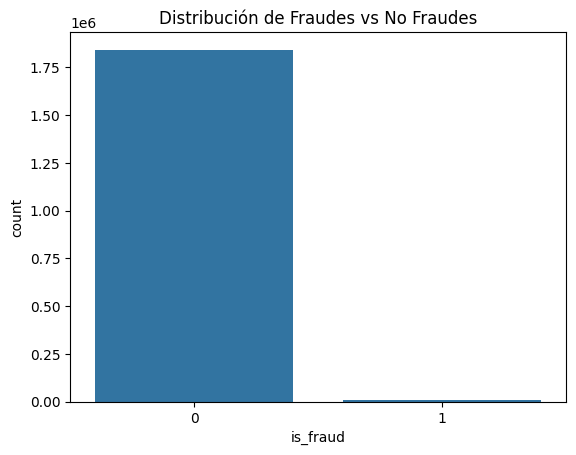

In [6]:
# Distribución
fraud_ratio = df['is_fraud'].value_counts(normalize=True)
print("Distribución de fraudes:")
print(fraud_ratio)

sns.countplot(x='is_fraud', data=df)
plt.title('Distribución de Fraudes vs No Fraudes')
plt.show()


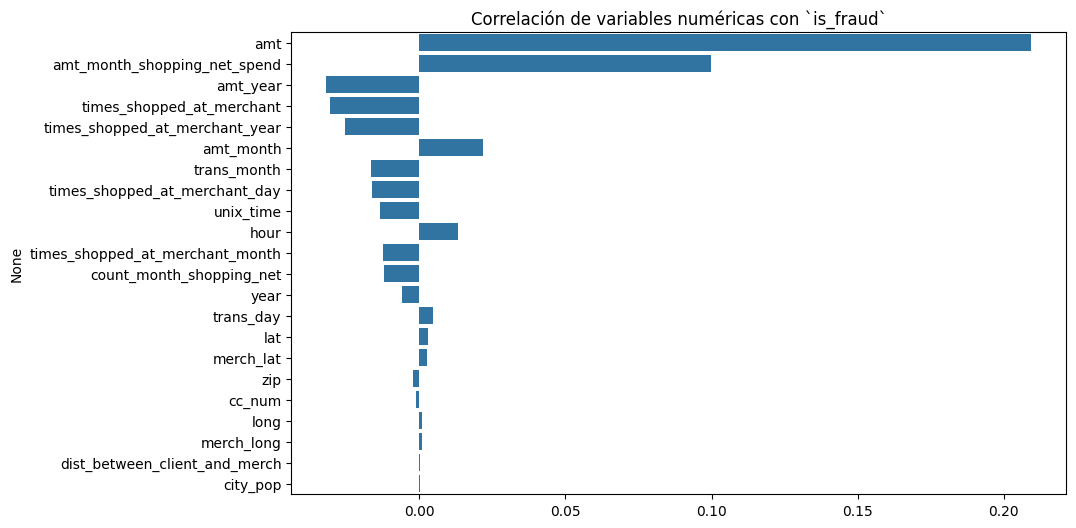

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['is_fraud'])
corr = numeric_cols.corrwith(df['is_fraud']).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Correlación de variables numéricas con `is_fraud`")
plt.show()


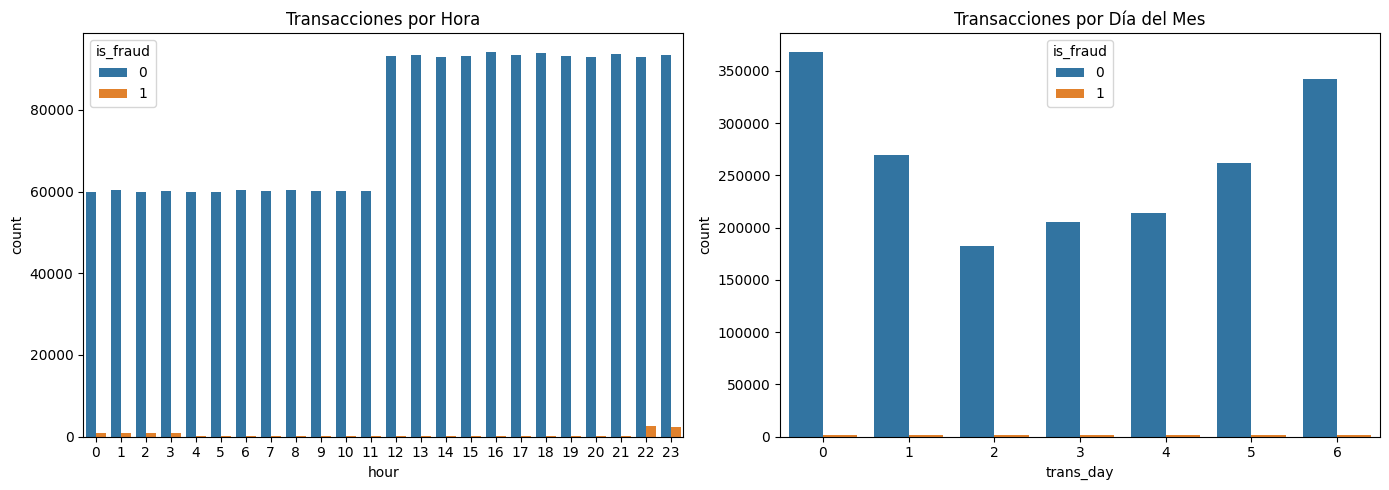

<function abs(x, /)>

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='hour', hue='is_fraud', data=df, ax=ax[0])
ax[0].set_title('Transacciones por Hora')

sns.countplot(x='trans_day', hue='is_fraud', data=df, ax=ax[1])
ax[1].set_title('Transacciones por Día del Mes')

plt.tight_layout()
plt.show()
abs

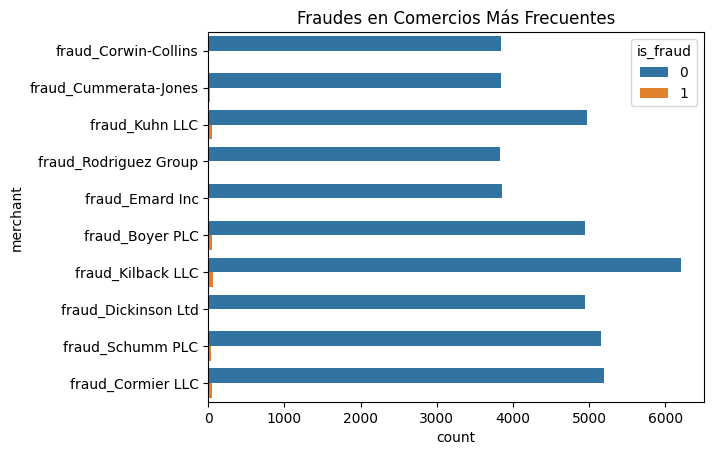

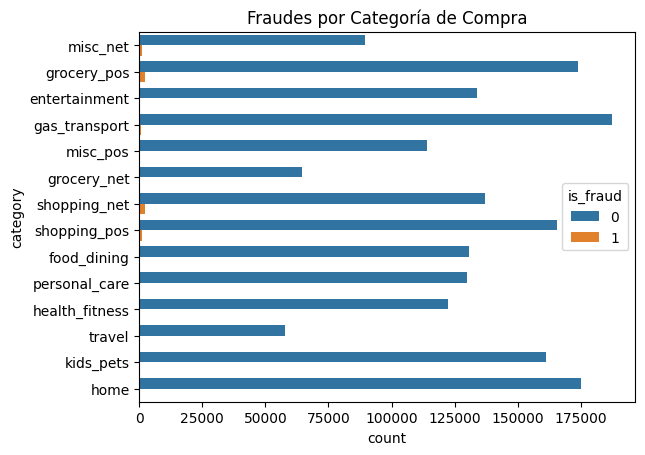

In [9]:
top_merchants = df['merchant'].value_counts().head(10).index
df_top = df[df['merchant'].isin(top_merchants)]

sns.countplot(y='merchant', hue='is_fraud', data=df_top)
plt.title("Fraudes en Comercios Más Frecuentes")
plt.show()

sns.countplot(y='category', hue='is_fraud', data=df)
plt.title("Fraudes por Categoría de Compra")
plt.show()


In [10]:
# ==============================
# VARIABLES ADICIONALES PARA COMPLEJIDAD
# ==============================

fraud_rate_by_merchant = df.groupby("merchant")["is_fraud"].mean()
df["merchant_fraud_rate"] = df["merchant"].map(fraud_rate_by_merchant)

fraud_rate_by_category = df.groupby("category")["is_fraud"].mean()
df["category_fraud_rate"] = df["category"].map(fraud_rate_by_category)

df["rel_freq_at_merchant"] = df["times_shopped_at_merchant_day"] / (df["times_shopped_at_merchant_month"] + 1)

client_mean_amt = df.groupby("cc_num")["amt"].transform("mean")
client_std_amt = df.groupby("cc_num")["amt"].transform("std")
df["zscore_amt"] = (df["amt"] - client_mean_amt) / (client_std_amt + 1e-5)

df["madrugada"] = df["hour"].isin([0, 1, 2, 3])
df["pct_madrugada"] = df.groupby("cc_num")["madrugada"].transform("mean")


In [11]:
from scipy.stats import zscore

# FLAG ORIGINAL DE PERFIL COMPLEJO
# regla_negocio = (
#     (df['amt_year'] > df['amt_year'].quantile(0.90)) &
#     (df['times_shopped_at_merchant_year'] > df['times_shopped_at_merchant_year'].quantile(0.90)) &
#     (df['count_month_shopping_net'] > df['count_month_shopping_net'].quantile(0.90))
# )


# MAYOR SENSIBILIDAD
# regla_negocio = (
#     (df['amt_year'] > df['amt_year'].quantile(0.80)) &
#     (df['times_shopped_at_merchant_year'] > df['times_shopped_at_merchant_year'].quantile(0.80)) &
#     (df['count_month_shopping_net'] > df['count_month_shopping_net'].quantile(0.80))
# )


df["zscore_amt_year"] = zscore(df["amt_year"].fillna(0))
umbral_percentil = df["amt_year"].quantile(0.90)

regla_negocio = (
    ((df['amt_year'] > umbral_percentil) | (df["zscore_amt_year"] > 2)) &
    (df['times_shopped_at_merchant_year'] > df['times_shopped_at_merchant_year'].quantile(0.90)) &
    (df['count_month_shopping_net'] > df['count_month_shopping_net'].quantile(0.90))
)


In [12]:
# FLAG DE DISPERSIÓN
df["client_std_amt"] = client_std_amt
client_std_time = df.groupby("cc_num")["unix_time"].transform("std")
df["client_std_time"] = client_std_time

global_amt_std = df["amt"].std()
global_time_std = df["unix_time"].std()

heuristica_dispersion = (
    (df["client_std_amt"] > global_amt_std * 2) &
    (df["client_std_time"] > global_time_std * 2)
)

# PERFIL COMPLEJO FINAL
df['is_complex_profile'] = regla_negocio | heuristica_dispersion


In [13]:
# ==============================
# DIVISIÓN DEL DATASET
# ==============================

train_df = df[df['trans_month'] < 12].copy()
test_df  = df[df['trans_month'] == 12].copy()

X_train = train_df.drop(columns=['is_fraud'])
y_train = train_df['is_fraud']
X_test = test_df.drop(columns=['is_fraud'])
y_test = test_df['is_fraud']

weights = (~X_train['is_complex_profile']).astype(int) * 2 + 1
X_train_model = X_train.drop(columns=['is_complex_profile'])
X_test_model = X_test.drop(columns=['is_complex_profile'])

# Asegurar tipos adecuados en los sets finales
for col in X_train_model.select_dtypes(include='object').columns:
    X_train_model[col] = X_train_model[col].astype('category')
    X_test_model[col] = X_test_model[col].astype('category')

train_set = lgb.Dataset(X_train_model, label=y_train, weight=weights)
valid_set = lgb.Dataset(X_test_model, label=y_test)


In [14]:
# ==============================
# FUNCIONES AUXILIARES Y MÉTRICAS
# ==============================

def compute_scale_pos_weight(y, cap=300):
    count_neg = np.sum(np.array(y) == 0)
    count_pos = np.sum(np.array(y) == 1)
    weight = count_neg / count_pos
    return min(weight, cap)

def custom_threshold(preds_proba, is_complex, threshold_simple=0.5, threshold_complex=0.7):
    return np.where(
        is_complex,
        preds_proba > threshold_complex,
        preds_proba > threshold_simple
    ).astype(int)

def report_fp_complex(y_true, y_pred, is_complex):
    false_positives = (y_true == 0) & (y_pred == 1)
    fp_complex = false_positives & is_complex
    print(f"Falsos Positivos totales: {false_positives.sum()}")
    print(f"Falsos Positivos en perfiles complejos: {fp_complex.sum()}")
    print(f"Proporción de FP complejos: {fp_complex.sum() / (false_positives.sum() + 1e-6):.4f}")

def feval_penalty_fp_complex(preds, train_data):
    labels = train_data.get_label()
    preds_binary = (preds > 0.5).astype(int)
    complexity = train_data.get_weight()
    if complexity is None:
        complexity = np.zeros_like(labels)
    tp = ((labels == 1) & (preds_binary == 1)).sum()
    fp = ((labels == 0) & (preds_binary == 1)).astype(int)
    fp_penalized = (fp * (1 + complexity)).sum()
    score = tp / (tp + fp_penalized + 1e-6)
    return 'tp_over_penalized_fp', score, True

def feval_f1_fp_penalty(preds, train_data):
    labels = train_data.get_label()
    preds_binary = (preds > 0.5).astype(int)
    complexity = train_data.get_weight()
    if complexity is None:
        complexity = np.zeros_like(labels)
    tp = ((labels == 1) & (preds_binary == 1)).sum()
    fp = ((labels == 0) & (preds_binary == 1)).sum()
    fn = ((labels == 1) & (preds_binary == 0)).sum()
    precision = tp / (tp + fp + 1e-6)
    recall = tp / (tp + fn + 1e-6)
    f1 = 2 * precision * recall / (precision + recall + 1e-6)
    fp_penalty = ((labels == 0) & (preds_binary == 1) & (complexity == 1)).sum()
    penalty_factor = fp_penalty / (tp + 1e-6)
    return 'f1_penalized', f1 - 0.1 * penalty_factor, True

def feval_precision_boosted(preds, train_data):
    labels = train_data.get_label()
    preds_binary = (preds > 0.5).astype(int)
    complexity = train_data.get_weight()
    if complexity is None:
        complexity = np.zeros_like(labels)
    tp = ((labels == 1) & (preds_binary == 1)).sum()
    fp = ((labels == 0) & (preds_binary == 1)).sum()
    precision = tp / (tp + fp + 1e-6)
    fp_complex = ((labels == 0) & (preds_binary == 1) & (complexity == 1)).sum()
    penalty = 0.05 * fp_complex
    return 'precision_boosted', precision - penalty / (tp + 1e-6), True


In [15]:
# ==============================
# ENTRENAMIENTO Y COMPARACIÓN FINAL
# ==============================

params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'scale_pos_weight': compute_scale_pos_weight(y_train),
    'seed': 42
}

results = {}

def entrenar_y_evaluar(feval_fn, nombre):
    print(f"\nEntrenando con métrica: {nombre}")
    model = lgb.train(
        params,
        train_set,
        valid_sets=[valid_set],
        num_boost_round=500,
        feval=feval_fn,
        callbacks=[
            lgb.early_stopping(50),
            lgb.log_evaluation(50)
        ]
    )
    preds_proba = model.predict(X_test_model)
    preds_bin = custom_threshold(preds_proba, X_test['is_complex_profile'])
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, preds_bin))
    print("\nClassification Report:")
    print(classification_report(y_test, preds_bin, digits=4))
    report_fp_complex(y_test.values, preds_bin, X_test['is_complex_profile'].values)
    return model, preds_proba, preds_bin

for name, feval_fn in [
    ("penalty_fp_complex", feval_penalty_fp_complex),
    ("f1_fp_penalty", feval_f1_fp_penalty),
    ("precision_boosted", feval_precision_boosted),
]:
    model, probas, bins = entrenar_y_evaluar(feval_fn, name)
    results[name] = {
        "model": model,
        "preds_bin": bins,
        "preds_proba": probas
    }



Entrenando con métrica: penalty_fp_complex
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 8801, number of negative: 1562995
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9524
[LightGBM] [Info] Number of data points in the train set: 1571796, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005604 -> initscore=-5.178687
[LightGBM] [Info] Start training from score -5.178687
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.976342	valid_0's tp_over_penalized_fp: 0.156627
[100]	valid_0's auc: 0.976189	val

In [16]:
# ==============================
# SELECCIÓN FINAL Y REPORTE
# ==============================

best_key = max(
    results,
    key=lambda k: classification_report(y_test, results[k]['preds_bin'], output_dict=True)['1']['f1-score']
)
print(f"\nMejor métrica: {best_key}")
y_pred_bin = results[best_key]['preds_bin']
is_complex = X_test['is_complex_profile']
false_positives = (y_test == 0) & (y_pred_bin == 1)
print(f"FP complejos: {false_positives[is_complex].sum()} / {false_positives.sum()}")


Mejor métrica: penalty_fp_complex
FP complejos: 33 / 3234
